In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# 一、查看数据集

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_set = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_set = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
final_ =  pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [4]:
train_set.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## 1.分析缺失值的处理
先将忽略空值，看看各个特征与Transported的相关性

根据其是否重要来决定如何处理，尽量精简工作量

In [6]:
train_sum = train_set.shape[0]
train_sum

8693

In [7]:
temp_data = train_set.dropna()
temp_data.shape

(6606, 14)

In [8]:
# 6.6k数据，还算挺多的，直接算
data_ret = temp_data.drop(['Name'], axis=1)
data_ret = data_ret.drop(['Cabin'], axis=1)
data_ret = data_ret.drop(['PassengerId'], axis=1)
data_ret.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True
11,Europa,False,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,True


In [9]:
map_HomePlanet ={
    'Earth':0,
    'Europa':1,
    'Mars':2
}

map_bool = {
    False : 0,
    True : 1
}

map_Destination = {
    '55 Cancri e' : 0,
    'PSO J318.5-22' : 1,
    'TRAPPIST-1e' : 2
}
data_ret.loc[:,'HomePlanet'] = data_ret.HomePlanet.map(map_HomePlanet)

data_ret.loc[:,'CryoSleep'] = data_ret.CryoSleep.map(map_bool)
data_ret.loc[:,'VIP'] = data_ret.VIP.map(map_bool)
data_ret.loc[:,'Transported'] = data_ret.Transported.map(map_bool)

data_ret.loc[:,'Destination'] = data_ret.Destination.map(map_Destination)
data_ret.head(10)

/tmp/ipykernel_26/3387375268.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 0 ... 1 0 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_ret.loc[:,'Transported'] = data_ret.Transported.map(map_bool)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
5,0,0,1,44.0,0,0.0,483.0,0.0,291.0,0.0,1
6,0,0,2,26.0,0,42.0,1539.0,3.0,0.0,0.0,1
8,0,0,2,35.0,0,0.0,785.0,17.0,216.0,0.0,1
9,1,1,0,14.0,0,0.0,0.0,0.0,0.0,0.0,1
11,1,0,0,45.0,0,39.0,7295.0,589.0,110.0,124.0,1


In [10]:
# 计算相关系数
data_ret.corr()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.081138,0.042933,0.140432,0.130006,0.224376,0.071919,0.116066,0.055204,0.040253,0.111806
CryoSleep,0.081138,1.000000,-0.096612,-0.085701,-0.082303,-0.255398,-0.210782,-0.228612,-0.202216,-0.199095,0.462803
Destination,0.042933,-0.096612,1.000000,-0.010014,-0.043718,0.055151,-0.108887,0.021464,-0.057562,-0.073714,-0.123773
Age,0.140432,-0.085701,-0.010014,1.000000,0.098138,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553
VIP,0.130006,-0.082303,-0.043718,0.098138,1.000000,0.029009,0.135386,0.013660,0.064792,0.130061,-0.042260
RoomService,0.224376,-0.255398,0.055151,0.074783,0.029009,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291
FoodCourt,0.071919,-0.210782,-0.108887,0.135844,0.135386,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025
ShoppingMall,0.116066,-0.228612,0.021464,0.042314,0.013660,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602
Spa,0.055204,-0.202216,-0.057562,0.123820,0.064792,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854
VRDeck,0.040253,-0.199095,-0.073714,0.105031,0.130061,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950


<Axes: >

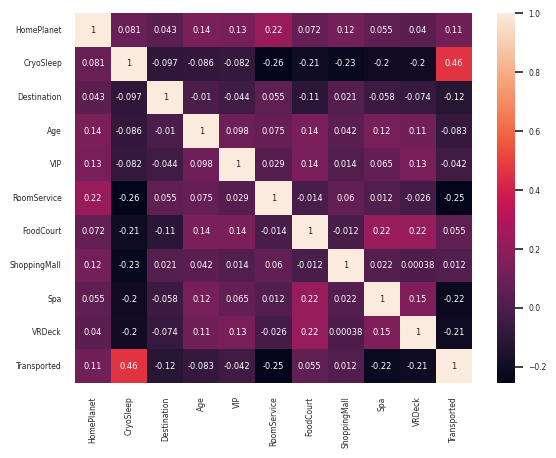

In [11]:
# 画图看
sns.set(font_scale=0.5)
sns.heatmap(data_ret.corr(), annot=True)


从图中可以看出，Transported和CryoSleep相关性还是比较高的

CryoSleep是是否冷冻休眠，首先将有指定服务的（比如RoomService、SPA这种的空值设为True，其余设为False

Age用均值填充

HomePlanet、Destination考虑按数据集非空值的比例进行填充

VIP用众数填充

奢侈服务中Spa、VRDeck、FoodCourt之间的相关性较高，排除掉选择冷冻休眠的，其余用众数填充

In [12]:
train_set.loc[:,'HomePlanet'] = train_set.HomePlanet.map(map_HomePlanet)
train_set.loc[:,'CryoSleep'] = train_set.CryoSleep.map(map_bool)
train_set.loc[:,'VIP'] = train_set.VIP.map(map_bool)
train_set.loc[:,'Transported'] = train_set.Transported.map(map_bool)
train_set.loc[:,'Destination'] = train_set.Destination.map(map_Destination)

/tmp/ipykernel_26/2321867414.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 0 ... 1 0 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  train_set.loc[:,'Transported'] = train_set.Transported.map(map_bool)


In [13]:
train_set.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,0.0,B/0/P,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0.0,0.0,F/0/S,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1.0,0.0,A/0/S,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1.0,0.0,A/0/S,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0.0,0.0,F/1/S,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
5,0005_01,0.0,0.0,F/0/P,1.0,44.0,0.0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1
6,0006_01,0.0,0.0,F/2/S,2.0,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1
7,0006_02,0.0,1.0,G/0/S,2.0,28.0,0.0,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1
8,0007_01,0.0,0.0,F/3/S,2.0,35.0,0.0,0.0,785.0,17.0,216.0,0.0,Andona Beston,1
9,0008_01,1.0,1.0,B/1/P,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1


In [14]:
test_set.loc[:,'HomePlanet'] = test_set.HomePlanet.map(map_HomePlanet)
test_set.loc[:,'CryoSleep'] = test_set.CryoSleep.map(map_bool)
test_set.loc[:,'VIP'] = test_set.VIP.map(map_bool)
test_set.loc[:,'Destination'] = test_set.Destination.map(map_Destination)
test_set.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,0.0,1.0,G/3/S,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,0.0,0.0,F/4/S,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,1.0,1.0,C/0/S,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,1.0,0.0,C/1/S,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,0.0,0.0,F/5/S,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,0.0,0.0,F/7/P,2.0,31.0,0.0,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,1.0,1.0,B/2/P,0.0,21.0,0.0,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,1.0,1.0,D/0/S,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,1.0,1.0,D/0/S,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,0.0,0.0,F/7/S,0.0,24.0,0.0,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [15]:
train_set = train_set.drop(['Name'], axis=1)
test_set = test_set.drop(['Name'], axis=1)

In [16]:
train_set['Age'] = train_set['Age'].fillna(train_set['Age'].median())
test_set['Age'] = test_set['Age'].fillna(test_set['Age'].median())


In [17]:
train_set['Age'] = train_set['Age'].fillna(train_set['Age'].median())
test_set['Age'] = test_set['Age'].fillna(test_set['Age'].median())

In [18]:
train_set['VIP'] = train_set['VIP'].fillna(train_set['VIP'].mode()[0])
test_set['VIP'] = test_set['VIP'].fillna(test_set['VIP'].mode()[0])

/tmp/ipykernel_26/367602181.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set['VIP'] = train_set['VIP'].fillna(train_set['VIP'].mode()[0])
/tmp/ipykernel_26/367602181.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_set['VIP'] = test_set['VIP'].fillna(test_set['VIP'].mode()[0])


In [19]:
# CryoSleep
train_set['CryoSleep'] = train_set.apply(lambda row: 1 if (
           row['RoomService'] == 0 and row['FoodCourt'] == 0 and row['ShoppingMall'] == 0 and row['Spa'] == 0 and
           row['VRDeck'] == 0 and row.isna().any()) else 0, axis=1)


test_set['CryoSleep'] = test_set.apply(lambda row: 1 if (
           row['RoomService'] == 0 and row['FoodCourt'] == 0 and row['ShoppingMall'] == 0 and row['Spa'] == 0 and
           row['VRDeck'] == 0 and row.isna().any()) else 0, axis=1)

In [20]:
# 将空值中row['CryoSleep']为true的（=1）这些消费先设为0
train_set['RoomService'] = train_set.apply(lambda row: 0 if (row['CryoSleep'] and row.isna().any()) else row['RoomService'], axis=1)
train_set['FoodCourt'] = train_set.apply(lambda row: 0 if (row['CryoSleep'] and row.isna().any()) else row['FoodCourt'], axis=1)
train_set['ShoppingMall'] = train_set.apply(lambda row: 0 if (row['CryoSleep'] and row.isna().any()) else row['ShoppingMall'], axis=1)
train_set['Spa'] = train_set.apply(lambda row: 0 if (row['CryoSleep'] and row.isna().any()) else row['Spa'], axis=1)
train_set['VRDeck'] = train_set.apply(lambda row: 0 if (row['CryoSleep'] and row.isna().any()) else row['VRDeck'], axis=1)


In [21]:
test_set['RoomService'] = test_set.apply(lambda row: 0 if (row['CryoSleep'] and row.isna().any()) else row['RoomService'], axis=1)
test_set['FoodCourt'] = test_set.apply(lambda row: 0 if (row['CryoSleep'] and row.isna().any()) else row['FoodCourt'], axis=1)
test_set['ShoppingMall'] = test_set.apply(lambda row: 0 if (row['CryoSleep'] and row.isna().any()) else row['ShoppingMall'], axis=1)
test_set['Spa'] = test_set.apply(lambda row: 0 if (row['CryoSleep'] and row.isna().any()) else row['Spa'], axis=1)
test_set['VRDeck'] = test_set.apply(lambda row: 0 if (row['CryoSleep'] and row.isna().any()) else row['VRDeck'], axis=1)


In [22]:
train_set.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1.0,0,B/0/P,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0.0,0,F/0/S,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,1.0,0,A/0/S,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,1.0,0,A/0/S,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0.0,0,F/1/S,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1
5,0005_01,0.0,0,F/0/P,1.0,44.0,0.0,0.0,483.0,0.0,291.0,0.0,1
6,0006_01,0.0,0,F/2/S,2.0,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,1
7,0006_02,0.0,0,G/0/S,2.0,28.0,0.0,0.0,0.0,0.0,0.0,NaN,1
8,0007_01,0.0,0,F/3/S,2.0,35.0,0.0,0.0,785.0,17.0,216.0,0.0,1
9,0008_01,1.0,0,B/1/P,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## 2. 分析Cabin列
Cabin: 休息仓/仓号/左右

单独画图看看

In [23]:
cabin_data = temp_data['Cabin']
cabin_data.shape

(6606,)

In [24]:
cabin = cabin_data.str.split('/' ,expand=True).rename(columns={0: 'deck', 1: 'num', 2:'side'})
cabin_deck = cabin['deck']
cabin_num = cabin['num']
cabin_side = cabin['side']
print(cabin_deck, cabin_num,cabin_side )

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: deck, Length: 6606, dtype: object 0          0
1          0
2          0
3          0
4          1
        ... 
8688      98
8689    1499
8690    1500
8691     608
8692     608
Name: num, Length: 6606, dtype: object 0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: side, Length: 6606, dtype: object


In [25]:
Trans = temp_data['Transported']
Trans

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6606, dtype: bool

In [26]:
deck_trans = pd.concat([cabin_deck,Trans ], axis = 1)
deck_trans.head(10)

,deck,Transported
0,B,False
1,F,True
2,A,False
3,A,False
4,F,True
5,F,True
6,F,True
8,F,True
9,B,True
11,B,True


Text(0.5, 1.0, 'Counts of True and False for Each deck')

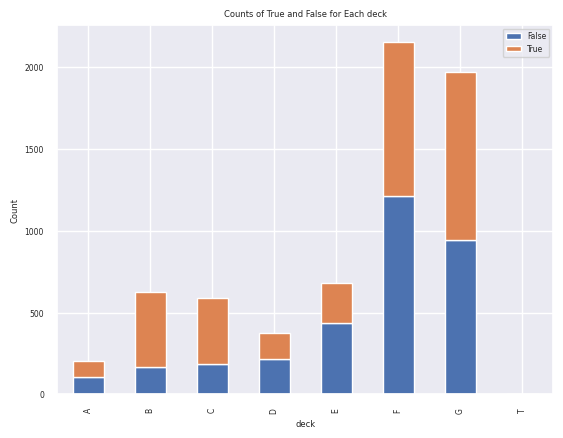

In [27]:
grouped = deck_trans.groupby(['deck', 'Transported']).size().unstack()
grouped.plot(kind='bar', stacked=True)
# 添加图例和标签
plt.legend(['False', 'True'])
plt.xlabel('deck')
plt.ylabel('Count')
plt.title('Counts of True and False for Each deck')

Text(0.5, 1.0, 'Counts of True and False for Each side')

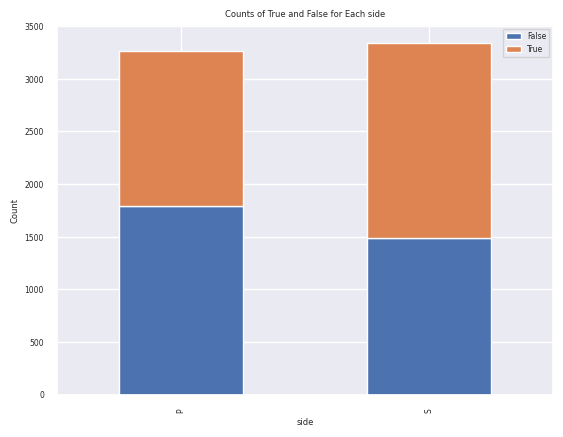

In [28]:
num_trans = pd.concat([cabin_side,Trans], axis = 1)

grouped = num_trans.groupby(['side', 'Transported']).size().unstack()
grouped.plot(kind='bar', stacked=True)
# 添加图例和标签
plt.legend(['False', 'True'])
plt.xlabel('side')
plt.ylabel('Count')
plt.title('Counts of True and False for Each side')

感觉 deck为b和c比较容易活下来，其他的基本对半开。

并且在S处更容易活下来，因此deck和side是比较重要的一个特征，num就舍弃了

In [29]:
## 处理
train_set[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = train_set['Cabin'].str.split('/', expand=True)
train_set = train_set.drop('Cabin', axis=1)
train_set = train_set.drop('Cabin_Num', axis=1)
train_set.head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Side
0,0001_01,1.0,0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,B,P
1,0002_01,0.0,0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,F,S
2,0003_01,1.0,0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,A,S
3,0003_02,1.0,0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,A,S
4,0004_01,0.0,0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,F,S
5,0005_01,0.0,0,1.0,44.0,0.0,0.0,483.0,0.0,291.0,0.0,1,F,P
6,0006_01,0.0,0,2.0,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,1,F,S
7,0006_02,0.0,0,2.0,28.0,0.0,0.0,0.0,0.0,0.0,NaN,1,G,S
8,0007_01,0.0,0,2.0,35.0,0.0,0.0,785.0,17.0,216.0,0.0,1,F,S
9,0008_01,1.0,0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1,B,P


In [30]:
test_set[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = test_set['Cabin'].str.split('/', expand=True)
test_set = test_set.drop('Cabin', axis=1)
test_set = test_set.drop('Cabin_Num', axis=1)
test_set.head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Side
0,0013_01,0.0,0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,G,S
1,0018_01,0.0,0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,F,S
2,0019_01,1.0,0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,C,S
3,0021_01,1.0,0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,C,S
4,0023_01,0.0,0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,F,S
5,0027_01,0.0,0,2.0,31.0,0.0,0.0,1615.0,263.0,113.0,60.0,F,P
6,0029_01,1.0,0,0.0,21.0,0.0,0.0,NaN,0.0,0.0,0.0,B,P
7,0032_01,1.0,0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,D,S
8,0032_02,1.0,0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,D,S
9,0033_01,0.0,0,0.0,24.0,0.0,0.0,639.0,0.0,0.0,0.0,F,S


In [31]:
# 剩下没填充的只有HomePlanet、Destination、Cabin_Deck、Cabin_Side  --->直接用众数填充

# RoomService、FoodCourt、 ShoppingMall、Spa、VRDeck  --->只剩下CryoSleep为0的

In [32]:
train_set['HomePlanet'] = train_set['HomePlanet'].fillna(train_set['HomePlanet'].mode()[0])
test_set['HomePlanet'] = test_set['HomePlanet'].fillna(test_set['HomePlanet'].mode()[0])

train_set['Destination'] = train_set['Destination'].fillna(train_set['Destination'].mode()[0])
test_set['Destination'] = test_set['Destination'].fillna(test_set['Destination'].mode()[0])

train_set['Cabin_Deck'] = train_set['Cabin_Deck'].fillna(train_set['Cabin_Deck'].mode()[0])
test_set['Cabin_Deck'] = test_set['Cabin_Deck'].fillna(test_set['Cabin_Deck'].mode()[0])


train_set['Cabin_Side'] = train_set['Cabin_Side'].fillna(train_set['Cabin_Side'].mode()[0])
test_set['Cabin_Side'] = test_set['Cabin_Side'].fillna(test_set['Cabin_Side'].mode()[0])

/tmp/ipykernel_26/3991764915.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set['HomePlanet'] = train_set['HomePlanet'].fillna(train_set['HomePlanet'].mode()[0])
/tmp/ipykernel_26/3991764915.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_set['HomePlanet'] = test_set['HomePlanet'].fillna(test_set['HomePlanet'].mode()[0])
/tmp/ipykernel_26/3991764915.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in 

In [33]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   float64
 2   CryoSleep     8693 non-null   int64  
 3   Destination   8693 non-null   float64
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   float64
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   int64  
 12  Cabin_Deck    8693 non-null   object 
 13  Cabin_Side    8693 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 950.9+ KB


In [34]:
# 代码待优化。。。
train_set['RoomService'] = train_set['RoomService'].fillna(train_set['RoomService'].mode()[0])
test_set['RoomService'] = test_set['RoomService'].fillna(test_set['RoomService'].mode()[0])

train_set['FoodCourt'] = train_set['FoodCourt'].fillna(train_set['FoodCourt'].mode()[0])
test_set['FoodCourt'] = test_set['FoodCourt'].fillna(test_set['FoodCourt'].mode()[0])

train_set['ShoppingMall'] = train_set['ShoppingMall'].fillna(train_set['ShoppingMall'].mode()[0])
test_set['ShoppingMall'] = test_set['ShoppingMall'].fillna(test_set['ShoppingMall'].mode()[0])

train_set['Spa'] = train_set['Spa'].fillna(train_set['Spa'].mode()[0])
test_set['Spa'] = test_set['Spa'].fillna(test_set['Spa'].mode()[0])

train_set['VRDeck'] = train_set['VRDeck'].fillna(train_set['VRDeck'].mode()[0])
test_set['VRDeck'] = test_set['VRDeck'].fillna(test_set['VRDeck'].mode()[0])

In [35]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   float64
 2   CryoSleep     8693 non-null   int64  
 3   Destination   8693 non-null   float64
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   float64
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   int64  
 12  Cabin_Deck    8693 non-null   object 
 13  Cabin_Side    8693 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 950.9+ KB


In [36]:
map_Cabin_Side = {
    'P' : 0,
    'S' : 1
}
train_set.loc[:,'Cabin_Side'] = train_set.Cabin_Side.map(map_Cabin_Side)
train_set.head(10)


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Side
0,0001_01,1.0,0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,B,0
1,0002_01,0.0,0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,F,1
2,0003_01,1.0,0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,A,1
3,0003_02,1.0,0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,A,1
4,0004_01,0.0,0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,F,1
5,0005_01,0.0,0,1.0,44.0,0.0,0.0,483.0,0.0,291.0,0.0,1,F,0
6,0006_01,0.0,0,2.0,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,1,F,1
7,0006_02,0.0,0,2.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1,G,1
8,0007_01,0.0,0,2.0,35.0,0.0,0.0,785.0,17.0,216.0,0.0,1,F,1
9,0008_01,1.0,0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1,B,0


In [37]:
test_set.loc[:,'Cabin_Side'] = test_set.Cabin_Side.map(map_Cabin_Side)
test_set.head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Side
0,0013_01,0.0,0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,G,1
1,0018_01,0.0,0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,F,1
2,0019_01,1.0,0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,C,1
3,0021_01,1.0,0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,C,1
4,0023_01,0.0,0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,F,1
5,0027_01,0.0,0,2.0,31.0,0.0,0.0,1615.0,263.0,113.0,60.0,F,0
6,0029_01,1.0,0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,B,0
7,0032_01,1.0,0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,D,1
8,0032_02,1.0,0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,D,1
9,0033_01,0.0,0,0.0,24.0,0.0,0.0,639.0,0.0,0.0,0.0,F,1


# 数据准备

In [38]:

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [39]:
categorical_features = ['Cabin_Deck']
preprocessor = ColumnTransformer(
       transformers=[
           ('cat', OneHotEncoder(), categorical_features) #独热
       ])

In [40]:
X = train_set.drop(['Transported', 'PassengerId'], axis=1)
y = train_set['Transported'].astype(int)
test_prep = test_set.drop(['PassengerId'], axis=1)

In [41]:
oh_deck_X = pd.DataFrame(preprocessor.fit_transform(X).toarray())
X = X.drop(['Cabin_Deck'], axis=1)
X = X.join(oh_deck_X)

In [42]:
oh_deck_X_test = pd.DataFrame(preprocessor.fit_transform(test_prep).toarray())
test_prep = test_prep.drop(['Cabin_Deck'], axis=1)
test_prep = test_prep.join(oh_deck_X_test)

In [43]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# 训练

In [44]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import precision_score , recall_score , f1_score, accuracy_score
from sklearn.metrics import confusion_matrix , classification_report


cb_classifier = CatBoostClassifier(verbose=False)
 
param_space = {
    'iterations': randint(100, 500),  # 迭代次数
    'depth': randint(4, 10),  # 树的最大深度
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],  # 学习率
    'l2_leaf_reg': randint(1, 10),  # L2 正则化系数
    'border_count': randint(100, 200),  # 边界计数
    'subsample': [0.5,0.6, 0.7, 0.8, 0.9, 1.0],  # 子样本比例
    'colsample_bylevel': [0.5, 0.6 , 0.7 , 0.8 , 0.9 ,1.0],  # 列采样比例
    'random_strength': randint(1, 10)  # 随机强度
}
 
random_search_cb = RandomizedSearchCV(estimator=cb_classifier, param_distributions=param_space, n_iter=100, cv=3, scoring='accuracy', n_jobs=-1)
 
random_search_cb.fit(X_train, y_train)
 
print("Best parameters:", random_search_cb.best_params_)
 
best_cb_model = random_search_cb.best_estimator_
y_pred_cb = best_cb_model.predict(X_test)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print("Accuracy:", accuracy_cb)


Best parameters: {'border_count': 166, 'colsample_bylevel': 0.8, 'depth': 5, 'iterations': 421, 'l2_leaf_reg': 6, 'learning_rate': 0.05, 'random_strength': 8, 'subsample': 0.6}
Accuracy: 0.7878090856814262


In [45]:
y_pred_test_cb = best_cb_model.predict(test_prep)
pred_df_cb = pd.DataFrame({
    'PassengerId': final_['PassengerId'],
    'Transported': y_pred_test_cb
})
pred_df_cb['Transported'] = pred_df_cb['Transported'].astype(bool)
 
pred_df_cb.to_csv("submission_cb_random_search.csv", index=False)


## TODO: id列 
这是参考了别人的做法，一开始没考虑到的

id里前一个能够看出人是否是一个group的，可以作为一个特征